# Breifly Exploring  the Reviews from Yelp Dataset  <img src="7JfL2cQ.png" alt="Yelp icon" height="42" width="50" align='right'>

Han Zhang

## 1. Business Understanding

The Yelp dataset is a subset of its businesses, reviews, and user data for use in personal, educational, and academic purposes. 

<img src="yelpdata.png">

The whole dataset includes 6 files: _business.json, review.json, photos.json, checkin.json, user.json and tip.json._ I  will go on and just make use of the first two files to extract the review text, rating stars categories and the corresponding business IDs within this exploration. I will try add more features in, such as the number of usefullness of a review, which would be more interesting. 

Based on these data, I am curious about what words people would use when leaving a 5-star review for restaurants, such as an Asian fusion restaurant. And also I would like to find out what specific aspects people were not satisfied with from the most frequently used words when they left 1-star reviews.

Once I start my modeling work later, detecting if a review is fake or predicting the possibility of receiving a 5-star rating in the near future would be my options to perform.

**Reference**

Yelp Challenge Dataset: https://www.yelp.com/dataset/challenge

## 2. Data overview

### 2.1 yelp_academic_dataset_review.json

This file contains full review text data including the user_id that wrote the review and the business_id the review is written for.

We will use _'text', 'business_id' and 'stars'_ in this analysis.

{
<p style="color:green;">string, 22 character unique review id</p>
     
   "review_id": "zdSx_SD6obEhz9VrW9uAWA",

<p style="color:green;">string, 22 character unique user id, maps to the user in user.json</p>
    "user_id": "Ha3iJu77CxlrFm-vQRs_8g",

<p style="color:green;">string, 22 character business id, maps to business in business.json</p>
    "business_id": "tnhfDv5Il8EaGSXZGiuQGg",

<p style="color:green;">integer, star rating</p>
    "stars": 4,

<p style="color:green;">string, date formatted YYYY-MM-DD</p>
    "date": "2016-03-09",

<p style="color:green;">string, the review itself</p>
    "text": "Great place to hang out after work: the prices are decent, and the ambience is fun. It's a bit loud, but very lively. The staff is friendly, and the food is good. They have a good selection of drinks.",

<p style="color:green;">integer, number of useful votes received</p>
    "useful": 0,

<p style="color:green;">integer, number of funny votes received</p>
    "funny": 0,

<p style="color:green;">integer, number of cool votes received</p>
    "cool": 0
}

### 2.2 yelp_academic_dataset_businesses.json

Contains business data including location data, attributes, and categories.

In this analysis, we will use the 'categories' and 'business_id'.

{
<p style="color:green;">string, 22 character unique string business id</p>
    "business_id": "tnhfDv5Il8EaGSXZGiuQGg",

<p style="color:green;">string, the business's name</p>
    "name": "Garaje",

<p style="color:green;">string, the neighborhood's name</p>
    "neighborhood": "SoMa",

<p style="color:green;">string, the full address of the business</p>
    "address": "475 3rd St",

<p style="color:green;">string, the city</p>
    "city": "San Francisco",

    ......
    ......
    ......

<p style="color:green;">an array of strings of business categories</p>
    "categories": [
        "Mexican",
        "Burgers",
        "Gastropubs"
    ],

<p style="color:green;">an object of key day to value hours, hours are using a 24hr clock</p>
    "hours": {
        "Monday": "10:00-21:00",
        "Tuesday": "10:00-21:00",
        "Friday": "10:00-21:00",
        "Wednesday": "10:00-21:00",
        "Thursday": "10:00-21:00",
        "Sunday": "11:00-18:00",
        "Saturday": "10:00-21:00"
    }
}

## 3. Data Encoding
### 3.1 conver JSON to CSV

* Extract attributes, 'categories' and 'business_id', from _yelp_academic_dataset_buinesses.json_. 



In [1]:
import csv
import json
import sys

# extract reviews, rating stars and business id
# open for writting
outfile_reviews = open("review_with_id.csv",'w',newline='')
sfile_reviews = csv.writer(outfile_reviews, delimiter =",", quoting=csv.QUOTE_MINIMAL)
sfile_reviews.writerow(['business_id','stars', 'text'])

with open('yelp_academic_dataset_review.json') as reviews:
    for line in reviews:
        row = json.loads(line)
        # some special char must be encoded in 'utf-8'
        sfile_reviews.writerow([row['business_id'],row['stars'], (row['text']).encode('utf-8')])
outfile_reviews.close()

* Extract attributes, 'business_id', 'stars' and 'text', from _yelp_academic_dataset_reviews.json_.

In [2]:
# extract business id and coresponding categories
# open for writting
outfile_categories = open("category_with_id.csv",'w',newline='')
sfile_categories = csv.writer(outfile_categories, delimiter =",", quoting=csv.QUOTE_MINIMAL)
sfile_categories.writerow(['business_id','categories'])
with open('yelp_academic_dataset_business.json') as businesses:
    for line in businesses:
        row = json.loads(line)
        # some special char must be encoded in 'utf-8'
        sfile_categories.writerow([row['business_id'],(row['categories'])])
outfile_categories.close()


Let's take a look at what the data looks like.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import warnings

df_review_with_id = pd.read_csv('review_with_id.csv') 
df_review_with_id.head()

,business_id,stars,text
0,uYHaNptLzDLoV_JZ_MuzUA,5,b'My girlfriend and I stayed here for 3 nights...
1,uYHaNptLzDLoV_JZ_MuzUA,3,"b""If you need an inexpensive place to stay for..."
2,uYHaNptLzDLoV_JZ_MuzUA,3,"b""Mittlerweile gibt es in Edinburgh zwei Ableg..."
3,uYHaNptLzDLoV_JZ_MuzUA,4,"b""Location is everything and this hotel has it..."
4,uYHaNptLzDLoV_JZ_MuzUA,5,b'gute lage im stadtzentrum. shoppingmeile und...


In [4]:
df_category_with_id = pd.read_csv('category_with_id.csv') 
df_category_with_id.head()

,business_id,categories
0,YDf95gJZaq05wvo7hTQbbQ,"['Shopping', 'Shopping Centers']"
1,mLwM-h2YhXl2NCgdS84_Bw,"['Food', 'Soul Food', 'Convenience Stores', 'R..."
2,v2WhjAB3PIBA8J8VxG3wEg,"['Food', 'Coffee & Tea']"
3,CVtCbSB1zUcUWg-9TNGTuQ,"['Professional Services', 'Matchmakers']"
4,duHFBe87uNSXImQmvBh87Q,"['Sandwiches', 'Restaurants']"


In [5]:
df_category_with_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156639 entries, 0 to 156638
Data columns (total 2 columns):
business_id    156639 non-null object
categories     156639 non-null object
dtypes: object(2)
memory usage: 2.4+ MB


In [6]:
df_review_with_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4736897 entries, 0 to 4736896
Data columns (total 3 columns):
business_id    object
stars          int64
text           object
dtypes: int64(1), object(2)
memory usage: 108.4+ MB


Great! That's what we want.

**Now we need to Merge the two CSV files according to 'business_id'.**


In [7]:
df = pd.merge(df_review_with_id,df_category_with_id, on="business_id", how="outer")

In [8]:
df.head()

,business_id,stars,text,categories
0,uYHaNptLzDLoV_JZ_MuzUA,5.0,b'My girlfriend and I stayed here for 3 nights...,"['Hotels', 'Hotels & Travel', 'Event Planning ..."
1,uYHaNptLzDLoV_JZ_MuzUA,3.0,"b""If you need an inexpensive place to stay for...","['Hotels', 'Hotels & Travel', 'Event Planning ..."
2,uYHaNptLzDLoV_JZ_MuzUA,3.0,"b""Mittlerweile gibt es in Edinburgh zwei Ableg...","['Hotels', 'Hotels & Travel', 'Event Planning ..."
3,uYHaNptLzDLoV_JZ_MuzUA,4.0,"b""Location is everything and this hotel has it...","['Hotels', 'Hotels & Travel', 'Event Planning ..."
4,uYHaNptLzDLoV_JZ_MuzUA,5.0,b'gute lage im stadtzentrum. shoppingmeile und...,"['Hotels', 'Hotels & Travel', 'Event Planning ..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4736898 entries, 0 to 4736897
Data columns (total 4 columns):
business_id    object
stars          float64
text           object
categories     object
dtypes: float64(1), object(3)
memory usage: 180.7+ MB


In [10]:
pd.isnull(df['stars'])  == True

0          False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
8          False
9          False
10         False
11         False
12         False
13         False
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
           ...  
4736868    False
4736869    False
4736870    False
4736871    False
4736872    False
4736873    False
4736874    False
4736875    False
4736876    False
4736877    False
4736878    False
4736879    False
4736880    False
4736881    False
4736882    False
4736883    False
4736884    False
4736885    False
4736886    False
4736887    False
4736888    False
4736889    False
4736890    False
4736891    False
4736892    False
4736893    False
4736894    False
4736895    Fal

There is a large amount of data. We will just make use of the first 500000 of them.

In [11]:
df = df[0:499999]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499999 entries, 0 to 499998
Data columns (total 4 columns):
business_id    499999 non-null object
stars          499999 non-null float64
text           499999 non-null object
categories     499999 non-null object
dtypes: float64(1), object(3)
memory usage: 19.1+ MB


### 3.2 Verify data quality
#### Remove anything except words which we only care about.

In [12]:
from nltk import word_tokenize
from nltk.corpus import stopwords
#nltk.download()
stop = set(stopwords.words('english'))
df['text_without_stopwords'] =df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# [i for i in word_tokenize(sentence.lower()) if i not in stop]

In [13]:
print(df['text_without_stopwords'][100])

b"Have even received food yet already bad experience. The soda machine completely diet drinks. So I went front let know pointed someone else said tell her. Because job? Then I'm trying tell person I treated rude snapped me. Very poor customer service."


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
n_features = 1000
count_vect = CountVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words='english') 
summary_text = df['text_without_stopwords']
# Learn the vocabulary dictionary and return term-document matrix.
bag_words = count_vect.fit_transform(summary_text)

In [15]:
print(bag_words.shape) # this is a sparse matrix
print('=========')
print(bag_words[0])

(499999, 1000)
  (0, 822)	1
  (0, 212)	1
  (0, 707)	1
  (0, 329)	1
  (0, 697)	1
  (0, 387)	1
  (0, 552)	1
  (0, 322)	1
  (0, 295)	1
  (0, 338)	1
  (0, 483)	1
  (0, 347)	1
  (0, 402)	2
  (0, 767)	1
  (0, 718)	3
  (0, 276)	1
  (0, 719)	1
  (0, 164)	1
  (0, 790)	1
  (0, 812)	2
  (0, 59)	1
  (0, 665)	1
  (0, 553)	1
  (0, 571)	1
  (0, 413)	2
  (0, 592)	2
  (0, 412)	1
  (0, 177)	1
  (0, 153)	1
  (0, 522)	1
  (0, 714)	2
  (0, 829)	1
  (0, 240)	1
  (0, 936)	2
  (0, 207)	2
  (0, 25)	1
  (0, 495)	1
  (0, 664)	1
  (0, 208)	1
  (0, 398)	3
  (0, 474)	2
  (0, 488)	1
  (0, 558)	1
  (0, 821)	1


In [16]:
print(len(count_vect.vocabulary_))
print(count_vect.vocabulary_)

1000
{'stayed': 821, 'nights': 558, 'loved': 488, 'location': 474, 'hotel': 398, 'decent': 208, 'price': 664, 'makes': 495, 'amazing': 25, 'deal': 207, 'walk': 936, 'door': 240, 'street': 829, 'right': 714, 'minute': 522, 'close': 153, 'corner': 177, 'including': 412, 'opened': 592, 'incredible': 413, 'nthe': 571, 'nice': 553, 'priced': 665, 'bar': 59, 'staff': 812, 'small': 790, 'comfortable': 164, 'rooms': 719, 'excellent': 276, 'room': 718, 'service': 767, 'huge': 402, 'giving': 347, 'lost': 483, 'gave': 338, 'fancy': 295, 'free': 322, 'ni': 552, 'highly': 387, 'recommend': 697, 'friends': 329, 'return': 707, 'definitely': 212, 'staying': 822, 'need': 545, 'place': 638, 'stay': 820, 'night': 557, 'longer': 478, 'better': 75, 'station': 819, 'old': 586, 'town': 888, 'new': 550, 'seeing': 756, 'food': 317, 'shopping': 774, 'walking': 938, 'clean': 149, 'good': 353, 'bed': 69, 'phone': 630, 'given': 346, 'lot': 484, 'attitude': 45, 'husband': 404, 'quite': 684, 'charged': 129, '15': 5,

In [17]:
## Convert the data into a sparse encoded tf-idf representation.
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,max_features=n_features,stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(summary_text)

In [18]:
print(tfidf.shape) # this is a sparse matrix
print('=========')
print(bag_words[0])

(499999, 1000)
  (0, 822)	1
  (0, 212)	1
  (0, 707)	1
  (0, 329)	1
  (0, 697)	1
  (0, 387)	1
  (0, 552)	1
  (0, 322)	1
  (0, 295)	1
  (0, 338)	1
  (0, 483)	1
  (0, 347)	1
  (0, 402)	2
  (0, 767)	1
  (0, 718)	3
  (0, 276)	1
  (0, 719)	1
  (0, 164)	1
  (0, 790)	1
  (0, 812)	2
  (0, 59)	1
  (0, 665)	1
  (0, 553)	1
  (0, 571)	1
  (0, 413)	2
  (0, 592)	2
  (0, 412)	1
  (0, 177)	1
  (0, 153)	1
  (0, 522)	1
  (0, 714)	2
  (0, 829)	1
  (0, 240)	1
  (0, 936)	2
  (0, 207)	2
  (0, 25)	1
  (0, 495)	1
  (0, 664)	1
  (0, 208)	1
  (0, 398)	3
  (0, 474)	2
  (0, 488)	1
  (0, 558)	1
  (0, 821)	1


In [19]:
print(len(tfidf_vectorizer.vocabulary_))
print(tfidf_vectorizer.vocabulary_)

1000
{'stayed': 821, 'nights': 558, 'loved': 488, 'location': 474, 'hotel': 398, 'decent': 208, 'price': 664, 'makes': 495, 'amazing': 25, 'deal': 207, 'walk': 936, 'door': 240, 'street': 829, 'right': 714, 'minute': 522, 'close': 153, 'corner': 177, 'including': 412, 'opened': 592, 'incredible': 413, 'nthe': 571, 'nice': 553, 'priced': 665, 'bar': 59, 'staff': 812, 'small': 790, 'comfortable': 164, 'rooms': 719, 'excellent': 276, 'room': 718, 'service': 767, 'huge': 402, 'giving': 347, 'lost': 483, 'gave': 338, 'fancy': 295, 'free': 322, 'ni': 552, 'highly': 387, 'recommend': 697, 'friends': 329, 'return': 707, 'definitely': 212, 'staying': 822, 'need': 545, 'place': 638, 'stay': 820, 'night': 557, 'longer': 478, 'better': 75, 'station': 819, 'old': 586, 'town': 888, 'new': 550, 'seeing': 756, 'food': 317, 'shopping': 774, 'walking': 938, 'clean': 149, 'good': 353, 'bed': 69, 'phone': 630, 'given': 346, 'lot': 484, 'attitude': 45, 'husband': 404, 'quite': 684, 'charged': 129, '15': 5,

# 4. Data Visualization

Visualize statistical summaries of the text data such as word frequencies, document lengths, most relevant words, vocabulary size, etc. 

## 4.1 Word Frequencies

Let's first find out the most common words used in reviews regardless of the categaries and rating stars.

In [20]:
df_cv = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
df['length_of_text'] = df['text'].map(lambda x: len(x))

In [21]:
word_fre = df_cv.sum().sort_values()[-15:]/df['length_of_text'].sum()

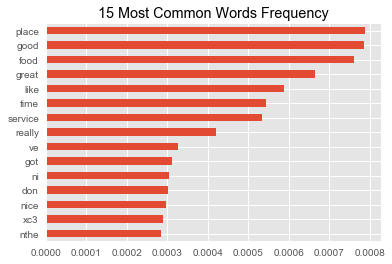

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
%matplotlib inline
import seaborn as sns

plt.style.use('ggplot')
ax = word_fre.plot(kind='barh')
plt.title('15 Most Common Words Frequency', color='black')

In [129]:
# just print them out for convenience
print(plt.style.available)

['_classic_test', 'bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn']


Let's find out what businesses are given longer reviews by customers.

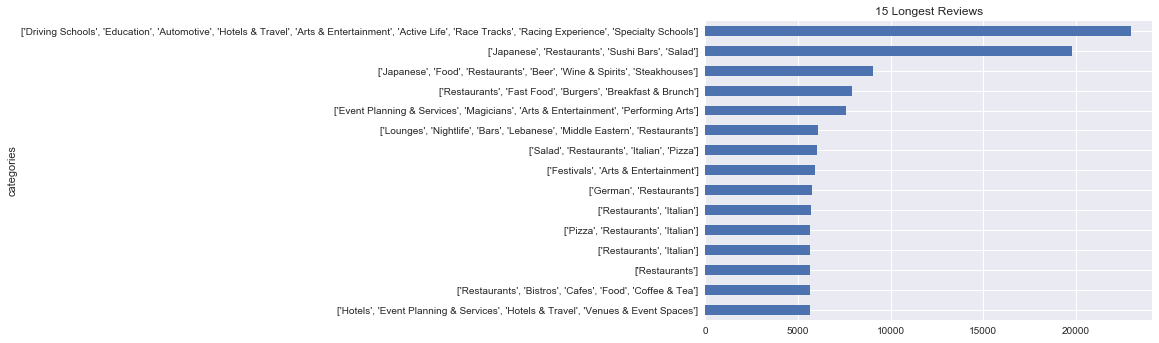

In [80]:
%matplotlib inline
plt.style.use('seaborn')
df_categoryIndex = df.set_index('categories')
ax = df_categoryIndex['length_of_text'].sort_values()[-15:].plot(kind='barh')
plt.title('15 Longest Reviews')

People are giving longer reviews for Japenese or Sushi restaurants. Let's take a closer look at it. More positive ones or negative ones?


However, both of them didnt give us much meaningful information.

So we need to do this sepecifically.

### 4.2 Japanese Sushi Restaurant and Pho 

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

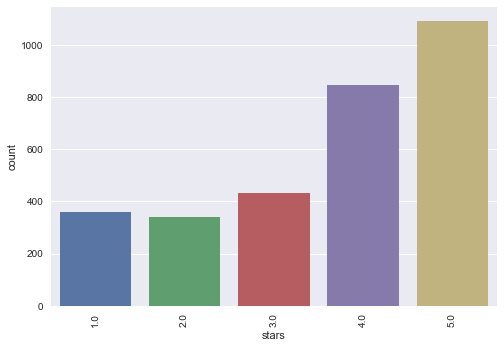

In [136]:
import seaborn as sns 
g = sns.countplot(df.stars[df.categories.str.contains("Japanese', 'Sushi")])
#g.set(xticklabels=[])
plt.xticks(rotation=90) # Number of reviews in each rating level

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

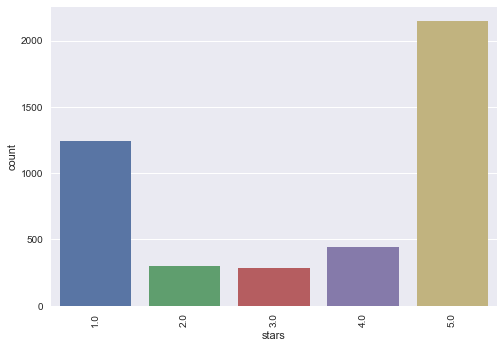

In [137]:
import seaborn as sns 
g = sns.countplot(df.stars[df.categories.str.contains("Pho")])
#g.set(xticklabels=[])
plt.xticks(rotation=90) # Number of reviews in each rating level

It seems that people left more negtive reviews for Pho restaurants, but also more positive ones.

### 4.3 Number of reviews in each rating level

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

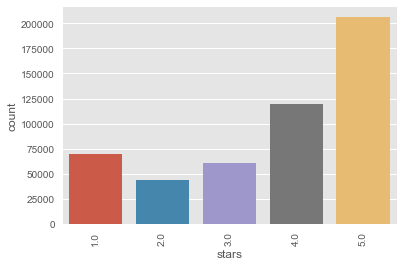

In [51]:
import seaborn as sns 
g = sns.countplot(df.stars)
plt.xticks(rotation=90) # Number of reviews in each rating level

People seem more likely to give a high rating.

Let's plot the length of reviews which are 5-star rated.

(array([   0,    1,    2, ..., 3636, 3637, 3638]),
 <a list of 3639 Text xticklabel objects>)

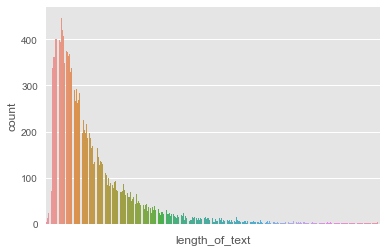

In [52]:
g = sns.countplot(df['length_of_text'][df.stars == 5])
g.set(xticklabels=[])
plt.xticks(rotation=90) # Number of reviews in each rating level

In [53]:
df['length_of_text'][df.stars == 5].describe()

count    206649.000000
mean        516.910834
std         492.641342
min          14.000000
25%         213.000000
50%         364.000000
75%         639.000000
max       22980.000000
Name: length_of_text, dtype: float64

We choose the reviews with 5 rating stars to see how long a review most people left if they had a great experience. We can see that lengths of words between 364 and 639 are most common.

Let's also take a look at the situation for 1-star rated reviews.

(array([   0,    1,    2, ..., 3884, 3885, 3886]),
 <a list of 3887 Text xticklabel objects>)

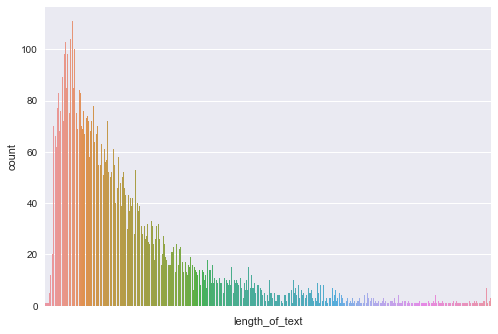

In [81]:
g = sns.countplot(df['length_of_text'][df.stars == 1])
g.set(xticklabels=[])
plt.xticks(rotation=90) # Number of reviews in each rating level

In [82]:
df['length_of_text'][df.stars == 1].describe()

count    69826.000000
mean       782.270687
std        729.553710
min          4.000000
25%        303.000000
50%        558.000000
75%        993.000000
max       5602.000000
Name: length_of_text, dtype: float64

People were really upset and used more words to describe their bad experience!

### 4.4 most common relevant words 

**What words people used frequently when they left a 5-star review for a modern european restaurants.**

In [ ]:
df.head(-100)

In [111]:
from sklearn.feature_extraction.text import CountVectorizer
n_features = 1000
count_vect_5 = CountVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words='english') 
summary_text_5 = df['text_without_stopwords'][(df.stars == 5) & df.categories.str.contains("Modern European', 'Restaurants")]
# Learn the vocabulary dictionary and return term-document matrix.
bag_words_5 = count_vect_5.fit_transform(summary_text_5)

In [112]:
print(len(count_vect_5.vocabulary_))
print(count_vect_5.vocabulary_)

1000
{'love': 485, 'place': 632, 'went': 963, 'boyfriend': 115, 'celebrate': 154, 'anniversary': 38, 'glad': 361, 'suggested': 856, 'food': 341, 'really': 694, 'good': 366, 'great': 373, 'cocktail': 191, 'list': 469, 'nwe': 557, 'shared': 787, 'hot': 409, 'balls': 70, 'delicious': 246, 'loved': 486, 'beef': 82, 'tartare': 872, 'potatoes': 653, 'cooked': 207, 'duck': 272, 'awesome': 65, 'finish': 330, 'lemon': 461, 'far': 318, 'best': 92, 'dessert': 249, 've': 925, 'tried': 906, 'person': 619, 'big': 95, 'perfect': 616, 'nthe': 553, 'service': 781, 'slow': 807, 'don': 267, 'waiter': 939, 'nice': 539, 'french': 344, 'ni': 538, 'definitely': 243, 'sad': 736, 'kind': 446, 'live': 472, 'lovely': 487, 'evening': 300, 'night': 542, 'table': 866, '17': 5, 'selection': 775, 'wine': 972, 'owner': 590, 'excellent': 302, 'heard': 393, 'mind': 510, 'price': 660, 'point': 644, 'meal': 501, 'choices': 179, 'overall': 588, 'bit': 98, 'pricey': 663, 'bottle': 111, 'south': 820, '50': 11, 'just': 442, '

In [113]:
count_vect_5.inverse_transform(bag_words_5[0])
pd.options.display.max_columns = 999
df_5 = pd.DataFrame(data=bag_words_5.toarray(),columns=count_vect_5.get_feature_names())

In [114]:
# print out 10 most common words in our data
df_5.sum().sort_values()[-10:]

like           78
amazing        80
service        96
delicious      98
restaurant    108
place         119
menu          122
good          130
great         176
food          226
dtype: int64

In [115]:
# print out 10 least common words in our data
df_5.sum().sort_values()[:10] # small sample size means most words occur one time

pig            3
carved         3
purchase       3
casual         3
provided       3
cauliflower    3
center         3
certain        3
certificate    3
puree          3
dtype: int64

(-0.5, 499.5, 249.5, -0.5)

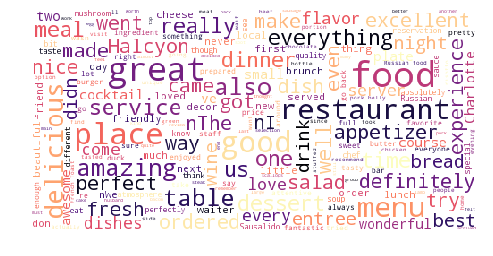

In [128]:
# Convert dataframe into string
summary_text_5_array = np.array(summary_text_5)
summary_text_5_str = np.array2string(summary_text_5_array)

# Generate a word cloud image
wordcloud_5 = WordCloud(max_font_size=40,background_color='white',width=500, height=250,colormap = 'plasma').generate(summary_text_5_str)

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")

We can find may big positive words above. People are very generous with their compliments when having a great experience.

**What words people used frequently when they left a 1-star review for a modern european restaurants.**

In [106]:
count_vect_1 = CountVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words='english') 
summary_text_1 = df['text_without_stopwords'][(df.stars == 1) & df.categories.str.contains("Modern European', 'Restaurants")]
# Learn the vocabulary dictionary and return term-document matrix.
bag_words_1 = count_vect_1.fit_transform(summary_text_1)

In [107]:
count_vect_1.inverse_transform(bag_words_1[0])
pd.options.display.max_columns = 999
df_1 = pd.DataFrame(data=bag_words_1.toarray(),columns=count_vect_1.get_feature_names())

In [109]:
# print out 10 most common words in our data
df_1.sum().sort_values()[-10:]

place          9
didn           9
left           9
like           9
waiter        14
minutes       15
good          15
service       19
restaurant    20
food          21
dtype: int64

In [110]:
# print out 10 least common words in our data
df_1.sum().sort_values()[:10] # small sample size means most words occur one time

half       2
non        2
ni         2
nearly     2
museum     2
mistake    2
tiny       2
mention    2
maybe      2
treated    2
dtype: int64

(-0.5, 499.5, 249.5, -0.5)

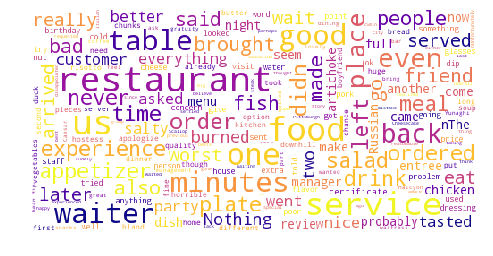

In [126]:
# Convert dataframe into string
summary_text_1_array = np.array(summary_text_1)
summary_text_1_str = np.array2string(summary_text_1_array)

# Generate a word cloud image
wordcloud = WordCloud(max_font_size=40,background_color='white',width=500, height=250,colormap = 'plasma').generate(summary_text_1_str)

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")

There are not many negative words as I expected. That's cool. People are friendly. And I would think that those bigger words represent the aspects in which the restaurants did bad.

# Exceptional Work

In [67]:
# Exception work
from os import path
from wordcloud import WordCloud


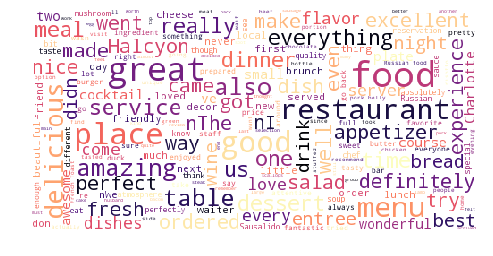

In [127]:
# Convert dataframe into string
#summary_text = df['text_without_stopwords']
summary_text_array = np.array(summary_text[df.stars == 5])
summary_text_str = np.array2string(summary_text_array)

# lower max_font_size
wordcloud = WordCloud(max_font_size=40,background_color='white',width=500, height=250,colormap = 'magma').generate(summary_text_str)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()